In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chisquare

In [5]:
# Import data for analysis
df = pd.read_csv("sample_dataset.csv")

### Understanding the dataset

* Conducting intital count of proportion in credit status, age groups and gender

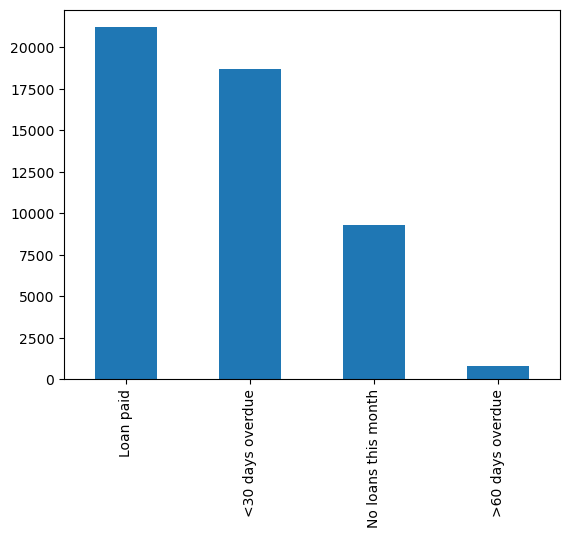

In [6]:
# Age
y = df["Credit Status"].value_counts()

y.plot(kind="bar")
plt.show()

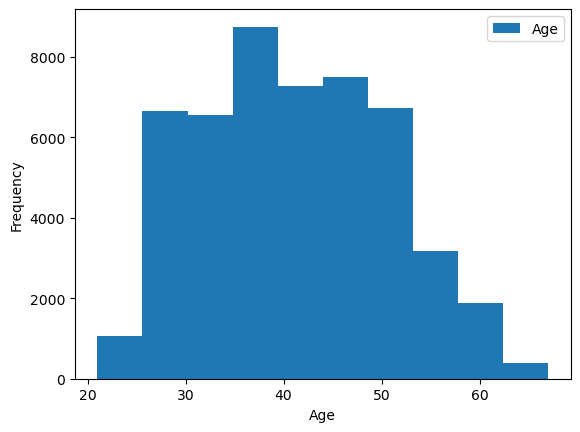

In [7]:
# Age distribution
x = df[["Age"]]
x.plot(kind="hist")
plt.xlabel("Age")
plt.show()

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

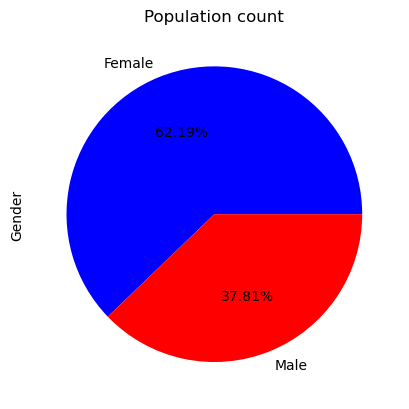

In [8]:
# Gender
# Finding the different labels
df["Gender"].unique()

# Count of different Gender
gender = df["Gender"].value_counts()

# Plotting in a pie chart 
gender.plot(kind="pie", title= "Population count",labels=["Female", "Male"], autopct="%.2f%%", colors=["blue", "red"])
plt.xticks

### Analysising age vs credit card payment status

* In this section, age groups are used to analyse whether different age influence credit card payment status

The age groups are binned under the following:
* 25 and younger', 
* 'between 25 and 40 years',
* 'between 40 and 64 years',
* '65 and older'

In [9]:
#Grouping age groups

# Creating a seperate dataframe for age and credit status
age_plot = df[["Credit Status","Age"]]

# Categorising age groups
bins = [0,25,40,64,70]
age_groups = ['25 and younger', 'between 26 and 40 years',
       'between 41 and 64 years', '65 and older']


age_plot["Age Group"] = pd.cut(age_plot["Age"],bins, labels=age_groups)

age_dem_counts = age_plot.value_counts().reset_index(name="Count")


/var/folders/85/smsz466n33125qlrbd4fzvd80000gn/T/ipykernel_89894/2896645235.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_plot["Age Group"] = pd.cut(age_plot["Age"],bins, labels=age_groups)


In [10]:
age_count = age_dem_counts.groupby([age_dem_counts['Age Group'], age_dem_counts['Credit Status']]).sum()

age_count = age_count[["Count"]]

age_count = age_count.reset_index()

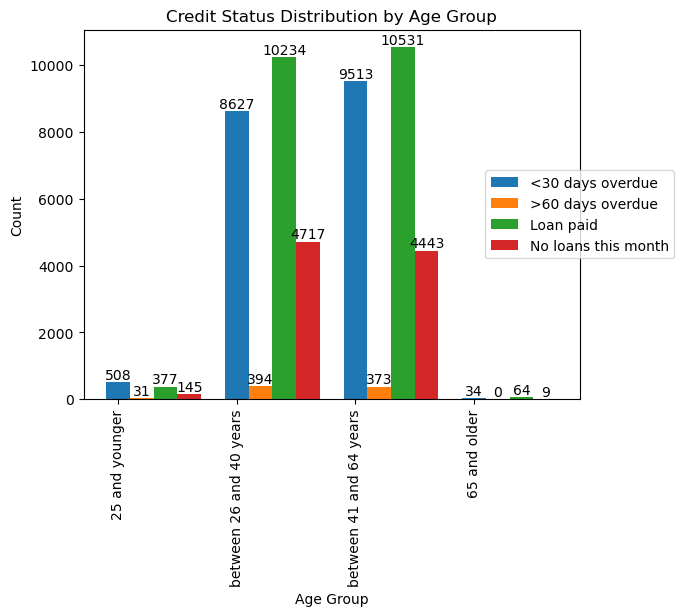

In [11]:
# Group labels
age_groups = age_count["Age Group"].unique()
credit_statuses = age_count["Credit Status"].unique()

# Create a dictionary to store the counts for each age group and credit status
counts = {}

# Populate the counts dictionary
for status in credit_statuses:
    counts[status] = age_count[age_count["Credit Status"] == status]["Count"].tolist()

# Set the bar width
bar_width = 0.2

# Set the positions for the bars
bar_positions = range(len(age_groups))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the grouped bars
for i, status in enumerate(credit_statuses):
    ax.bar([p + i * bar_width for p in bar_positions], counts[status], bar_width, label=status)

# Set the x-axis tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(age_groups)
for container in ax.containers:
    ax.bar_label(container)

# Set the labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Credit Status Distribution by Age Group')
plt.xticks(rotation="vertical")
# Add a legend
ax.legend(loc='center',bbox_to_anchor=(1, 0.5))

# Save as image 
plt.savefig("Output_data/Fig1.png")

# Show the plot
plt.show()



#### Performing chi square test

In [12]:
# Create a table to perform chi square test
contingency_table = pd.pivot_table(age_count, values='Count', index='Age Group', columns='Credit Status', fill_value=0)
contingency_table

Credit Status,<30 days overdue,>60 days overdue,Loan paid,No loans this month
Age Group,,,,
25 and younger,508,31,377,145
between 26 and 40 years,8627,394,10234,4717
between 41 and 64 years,9513,373,10531,4443
65 and older,34,0,64,9


In [13]:
# Perform the chi-square test
chi2, p_value = chisquare(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

for p in p_value >=0.5:
    if p: 
        print("There is no relationship between age and credit card payment status")

    else:
        print("There is a relationship between age and credit card payment status")

Chi-square statistic: [16684.9881169    682.33082707 19496.24313873  8728.27786128]
P-value: [0.00000000e+000 1.42336452e-147 0.00000000e+000 0.00000000e+000]
There is a relationship between age and credit card payment status
There is a relationship between age and credit card payment status
There is a relationship between age and credit card payment status
There is a relationship between age and credit card payment status


## Analysing gender vs credit card payment status

* In this section, gender data is used to analyse whether gender has an influence on the credit card payment status 

In [14]:
gender_plot = df[["Gender", "Credit Status"]]


gender_count = gender_plot.groupby([gender_plot['Gender'], gender_plot['Credit Status']]).sum()
gender_count = gender_plot.value_counts().reset_index(name="Count")

gender_count

,Gender,Credit Status,Count
0,F,Loan paid,13383
1,F,<30 days overdue,11630
2,M,Loan paid,7823
3,M,<30 days overdue,7052
4,F,No loans this month,5645
5,M,No loans this month,3669
6,F,>60 days overdue,435
7,M,>60 days overdue,363


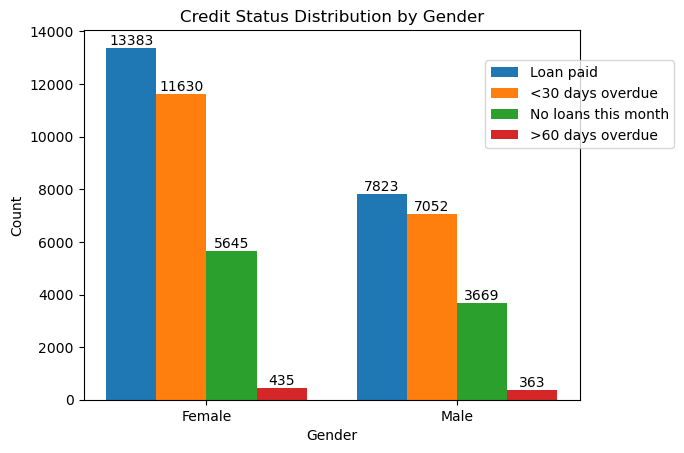

In [15]:
# Group labels
gender_groups = gender_count["Gender"].unique()
credit_statuses = gender_count["Credit Status"].unique()

# Create a dictionary to store the counts for each age group and credit status
counts = {}

# Populate the counts dictionary
for status in credit_statuses:
    counts[status] = gender_count[gender_count["Credit Status"] == status]["Count"].tolist()

# Set the bar width
w = 0.2

# Set the positions for the bars
bar_positions = range(len(gender_groups))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the grouped bars
for i, status in enumerate(credit_statuses):
    ax.bar([p + i * w for p in bar_positions], counts[status], w, label=status)


# Set the x-axis tick positions and labels
ax.set_xticks([p + (len(credit_statuses) - 1) * w / 2 for p in bar_positions])
ax.set_xticklabels(gender_groups)
for container in ax.containers:
    ax.bar_label(container)


# Set the labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Credit Status Distribution by Gender')
ax.set_xticklabels(["Female", "Male"])

# Add a legend
ax.legend(loc='center',bbox_to_anchor=(1, 0.8))

# Save as image
plt.savefig("Output_data/Fig2.png")

# Show the plot
plt.show()

#### Performing chi square test

In [16]:
# Create a table to perform chi square test
contingency_table2 = pd.pivot_table(gender_count, values='Count', index='Gender', columns='Credit Status', fill_value=0)
contingency_table2

Credit Status,<30 days overdue,>60 days overdue,Loan paid,No loans this month
Gender,,,,
F,11630,435,13383,5645
M,7052,363,7823,3669


In [17]:
# Perform the chi-square test
chi2, p_value = chisquare(contingency_table2)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

for p in p_value >=0.5:
    if p: 
        print("There is no relationship between gender and credit card payment status")

    else:
        print("There is a relationship between gender and credit card payment status")

Chi-square statistic: [1121.83299433    6.4962406  1457.7761011   419.21580417]
P-value: [5.93813628e-246 1.08102835e-002 0.00000000e+000 3.61523171e-093]
There is a relationship between gender and credit card payment status
There is a relationship between gender and credit card payment status
There is a relationship between gender and credit card payment status
There is a relationship between gender and credit card payment status
